In [1]:
import numpy as np
import random
from math import exp,log
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Logical  AND 학습을 위한 data
X = np.array([(0,0),(1,0),(0,1),(1,1)])
Y_AND = np.array([0,0,0,1])
Y_OR = np.array([0,1,1,1])
Y_XOR = np.array([0,1,1,0])
epoch_num = 10000

In [3]:
class logistic_regression_model():
    def __init__(self):
        self.w = np.random.normal(size=2)
        self.b = np.random.normal(size=1)
        
    def sigmoid(self,z):
        return 1/(1+exp(-z))
    
    def predict(self, x):
        z = np.inner(self.w, x) + self.b
        a = self.sigmoid(z)
        return a

In [4]:
def train(X, Y, model, lr = 0.1):
    dw = np.array([0.0,0.0])
    db = 0.0
    m = len(X)
    cost = 0.0
    
    for x,y in zip(X, Y):
        a = model.predict(x)
        if y == 1:
            cost -= log(a)
        else:
            cost -= log(1-a)
    
        dw += (a-y)*x
        db += (a-y)
        
    cost /= m
    model.w -= lr * dw/m
    model.b -= lr*db/m
    return cost

In [5]:
def AND(model):
    cost_list = []
    for epoch in range(epoch_num):
        cost = train(X, Y_AND, model, 0.1)
        cost_list.append(cost)
    return cost_list
    
def OR(model):
    cost_list = []
    for epoch in range(epoch_num):
        cost = train(X, Y_OR, model, 0.1)
        cost_list.append(cost)
    return cost_list

def XOR(model):
    cost_list = []
    for epoch in range(epoch_num):
        cost = train(X, Y_XOR, model, 0.1)
        cost_list.append(cost)
    return cost_list

In [6]:
# AND, OR, XOP paremeter들의 학습과정에서 얻는 cost들을 graph로 표현한다.
def graph(epoch_num, And, Or, Xor):
    x = range(0,epoch_num)
    plt.figure(figsize=(18,6))
    # AND
    plt.subplot(131)
    plt.title("AND")
    plt.plot(x,And)
    #OR
    plt.subplot(132)
    plt.title("OR")
    plt.plot(x,Or)
    #XOR
    plt.subplot(133)
    plt.title("XOR")
    plt.plot(x,Xor)
    plt.show()
# AND, OR, XOP paremeter들의 학습과정에서 얻는 cost들을 table로 표현한다..   
def table(epoch_num, And, Or, Xor):
    source = {'Logical AND':And ,'Logical OR':Or ,'Logical XOR':Xor }
    data = pd.DataFrame(source)
    print("0~10000")
    print(data)
    
    extrac = []
    for i in range(epoch_num):
        if i % 100 == 0:
            extrac.append([And[i],Or[i],Xor[i]])
    E = np.array(extrac)
    Esource = {'Logical AND':E[:,0] ,'Logical OR':E[:,1] ,'Logical XOR':E[:,2]}
    Edata = pd.DataFrame(Esource)
    print("0~10000 >> 0~100 (100epoch에 따른 결과변화)")
    print(Edata)

In [13]:
# 학습시킨 model의 결과를 확인한다.
def model_test(And, Or, Xor,X):
    gate = [And, Or, Xor]
    gate_name = ["AND","OR","XOR"]
    for i in range(3):
        print(gate_name[i])
        for x in X:
            print(x, gate[i].predict(x))
            
# and, or, xor model을 생성하고 학습한다.  
def main():
    #parameter별 model
    and_model = logistic_regression_model()
    or_model = logistic_regression_model()
    xor_model = logistic_regression_model()
    
    And = AND(and_model)
    Or = OR(or_model)
    Xor = XOR(xor_model)
    
    # cost변화 확인하기
    graph(epoch_num, And, Or, Xor)
    table(epoch_num, And, Or, Xor)
    model_test(and_model, or_model, xor_model,X)

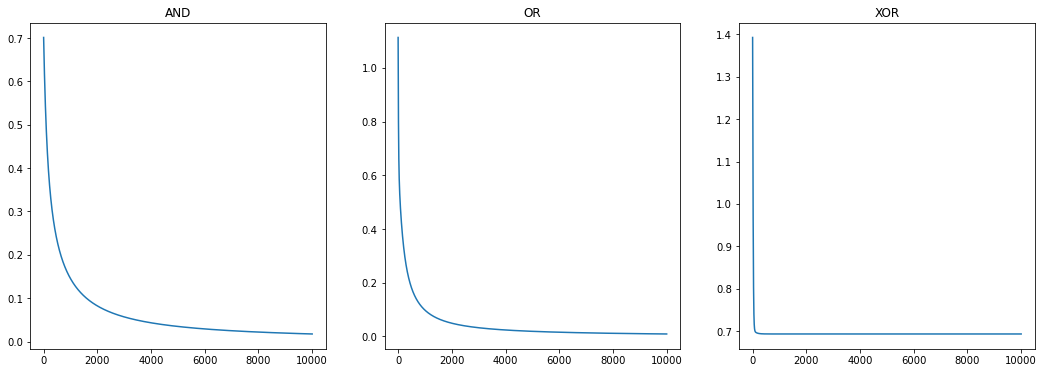

0~10000
      Logical AND  Logical OR  Logical XOR
0        0.701441    1.113448     1.392823
1        0.698295    1.079151     1.366031
2        0.695183    1.046831     1.339737
3        0.692106    1.016414     1.313956
4        0.689062    0.987826     1.288702
...           ...         ...          ...
9995     0.017482    0.009398     0.693147
9996     0.017480    0.009397     0.693147
9997     0.017478    0.009396     0.693147
9998     0.017476    0.009395     0.693147
9999     0.017475    0.009394     0.693147

[10000 rows x 3 columns]
0~10000 >> 0~100 (100epoch에 따른 결과변화)
    Logical AND  Logical OR  Logical XOR
0      0.701441    1.113448     1.392823
1      0.487526    0.457049     0.698392
2      0.377211    0.337859     0.694749
3      0.310765    0.263934     0.693734
4      0.265842    0.215036     0.693374
..          ...         ...          ...
95     0.018396    0.009902     0.693147
96     0.018204    0.009796     0.693147
97     0.018015    0.009692     0.693147
98 

In [14]:
main()